In [1]:
import pandas as pd
import re
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

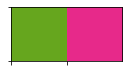

In [2]:
custcoltemp = ["#66a61e", "#e7298a"]
sns.palplot(sns.color_palette(custcoltemp))

In [3]:
folder = "./"
file = folder + "/Figure1d_raw_data.txt"

# print(os.path.realpath(file))

raw = pd.read_csv(file,sep = "\t", header = 0, index_col=0)

print (raw.head())

   donor virus  temperature  image     Mean  Median
0      1    Fr           33    184  297.905     296
1      1    Fr           33    184  306.972     304
2      1    Fr           33    184  325.676     324
3      1    Fr           33    184  309.753     310
4      1    Fr           33    184  290.933     289


In [4]:
raw["MeanLog"] = np.log10(raw['Mean'])
raw[0:5]

,donor,virus,temperature,image,Mean,Median,MeanLog
0,1,Fr,33,184,297.905,296,2.474078
1,1,Fr,33,184,306.972,304,2.487099
2,1,Fr,33,184,325.676,324,2.512786
3,1,Fr,33,184,309.753,310,2.491016
4,1,Fr,33,184,290.933,289,2.463793


In [5]:
mock = raw.loc[raw["virus"]=="Mock"]
std_mean = np.std(mock['MeanLog'])
mean_tot = np.mean(mock['MeanLog'])

print("Mean :"+ "\t\t" +  str(mean_tot))
print("std :"+ "\t\t" + str(std_mean))
print("Mean + 3x std :" + "\t" + str(mean_tot + (3*std_mean)))

Mean :		2.5547032672876586
std :		0.04037251855330654
Mean + 3x std :	2.6758208229475784


In [6]:
raw['infected_mean_3std'] = [1 if x >= (mean_tot+(3*std_mean)) else 0 for x in raw['MeanLog']]

In [7]:
finalraw = raw.groupby(["donor","virus", "temperature"]).mean().reset_index()

In [8]:
finalraw['infected_mean_3std_%'] = finalraw['infected_mean_3std']*100
finalraw.to_csv('Figure1d_final_table.txt', header=True, index=True, sep='\t')
finalraw

,donor,virus,temperature,image,Mean,Median,MeanLog,infected_mean_3std,infected_mean_3std_%
0,1,Fr,33,188.252182,316.086341,314.427339,2.497872,0.005683,0.568297
1,1,Fr,37,197.013045,334.945505,331.958474,2.520108,0.027186,2.718582
2,1,Mock,33,206.962355,336.075433,335.382859,2.525497,0.000000,0.000000
3,1,Mock,37,217.003084,360.021501,359.361484,2.555729,0.000272,0.027213
4,1,Wu,33,170.081272,375.576506,372.925595,2.570016,0.078356,7.835575
5,1,Wu,37,178.928054,349.115886,346.817368,2.538866,0.042966,4.296639
6,2,Fr,33,133.967446,317.157943,315.848706,2.500677,0.000209,0.020868
7,2,Fr,37,142.718890,317.159538,314.332017,2.497786,0.011953,1.195304
8,2,Mock,33,152.059975,341.180199,340.143789,2.531839,0.001255,0.125471
9,2,Mock,37,161.400245,332.790993,332.019501,2.521249,0.000000,0.000000


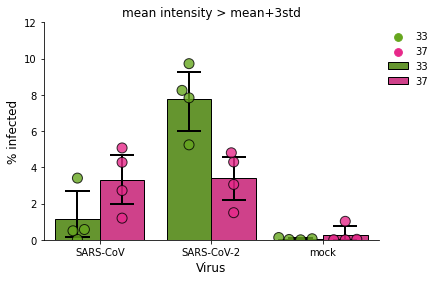

In [9]:
fig, ax = plt.subplots()
g = sns.barplot(data= finalraw,
                x='virus',
                y='infected_mean_3std_%', 
                hue="temperature",
                order=["Fr", "Wu", "Mock"],
                palette = sns.color_palette(custcoltemp),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= finalraw,
                x='virus',
                y='infected_mean_3std_%',
                hue="temperature",
                order=["Fr", "Wu", "Mock"],
                dodge = True, 
                palette = sns.color_palette(custcoltemp),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )

plt.yscale("linear")
plt.ylim([0,12])
ax.set_xticklabels(["SARS-CoV", "SARS-CoV-2", "mock"])
plt.title("mean intensity > mean+3std")
plt.ylabel("% infected",size="large")
plt.xlabel("Virus",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

# plt.savefig("IFA_%infected_graph.pdf", bbox_inches = 'tight')

In [10]:
from scipy import stats
from statannot import add_stat_annotation

In [11]:
Fr_33_a = finalraw[(finalraw["virus"]=="Fr") & (finalraw["temperature"]==33)]
Fr_37_a = finalraw[(finalraw["virus"]=="Fr") & (finalraw["temperature"]==37)]

Wu_33_a = finalraw[(finalraw["virus"]=="Wu") & (finalraw["temperature"]==33)]
Wu_37_a = finalraw[(finalraw["virus"]=="Wu") & (finalraw["temperature"]==37)]

mock_33_a = finalraw[(finalraw["virus"]=="Mock") & (finalraw["temperature"]==33)]
mock_37_a = finalraw[(finalraw["virus"]=="Mock") & (finalraw["temperature"]==37)]

In [12]:
Fr_33 = Fr_33_a["infected_mean_3std_%"]
Fr_37 = Fr_37_a["infected_mean_3std_%"]

Wu_33 = Wu_33_a["infected_mean_3std_%"]
Wu_37 = Wu_37_a["infected_mean_3std_%"]

mock_33 = mock_33_a["infected_mean_3std_%"]
mock_37 = mock_37_a["infected_mean_3std_%"]

In [13]:
# SARS-CoV 33°C vs SARS-CoV 37°C
print(stats.ttest_rel(Fr_33,Fr_37))

Ttest_relResult(statistic=-2.611645851349523, pvalue=0.07957197620253274)


In [14]:
# SARS-CoV-2 33°C vs SARS-CoV-2 37°C
print(stats.ttest_rel(Wu_33,Wu_37))

Ttest_relResult(statistic=5.611254563107697, pvalue=0.011187604866402873)


In [15]:
# mock 33°C vs mock 37°C
print(stats.ttest_rel(mock_33,mock_37))

Ttest_relResult(statistic=-0.8439237736824509, pvalue=0.4606892682519924)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Wu_33 v.s. Wu_37: t-test paired samples, P_val=1.119e-02 stat=5.611e+00
Fr_33 v.s. Fr_37: t-test paired samples, P_val=7.957e-02 stat=-2.612e+00
Mock_33 v.s. Mock_37: t-test paired samples, P_val=4.607e-01 stat=-8.439e-01
Fr_33 v.s. Wu_33: t-test paired samples, P_val=7.234e-03 stat=-6.550e+00
Fr_37 v.s. Wu_37: t-test paired samples, P_val=9.049e-01 stat=-1.299e-01


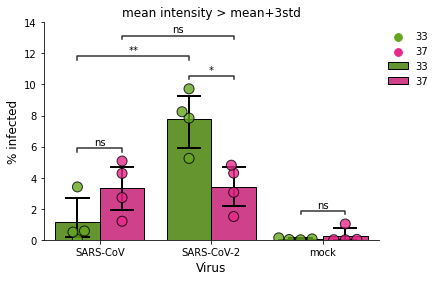

In [16]:
fig, ax = plt.subplots()
g = sns.barplot(data= finalraw,
                x='virus',
                y='infected_mean_3std_%', 
                hue="temperature",
                order=["Fr", "Wu", "Mock"],
                palette = sns.color_palette(custcoltemp),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= finalraw,
                x='virus',
                y='infected_mean_3std_%',
                hue="temperature",
                order=["Fr", "Wu", "Mock"],
                dodge = True, 
                palette = sns.color_palette(custcoltemp),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )

x = "virus"
y='infected_mean_3std_%'
hue = "temperature"

box_pairs=[
    (("Fr", 33), ("Fr", 37)),
    (("Wu", 33), ("Wu", 37)),
    (("Mock", 33), ("Mock", 37)),
    (("Fr", 33), ("Wu", 33)),
    (("Fr", 37), ("Wu", 37)),
    ]

add_stat_annotation(ax, data=finalraw, order=["Fr", "Wu", "Mock"], x=x, y=y, hue=hue, box_pairs=box_pairs, test='t-test_paired',  comparisons_correction= None, loc='inside', verbose=2)


plt.yscale("linear")
plt.ylim([0,14])
ax.set_xticklabels(["SARS-CoV", "SARS-CoV-2", "mock"])
plt.title("mean intensity > mean+3std")
plt.ylabel("% infected",size="large")
plt.xlabel("Virus",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig("Figure1d.pdf", bbox_inches = 'tight')